
Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox


# If you're working locally:
else:
    DATA_PATH = '../data/'

In [3]:
from zipfile import ZipFile 
# specifying the zip file name 
file_name = ["../data/df_2008_2018.zip"]
  
# opening the zip file in READ mode 
for file in file_name:
    with ZipFile(file, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall() 
        print('Done!')

File Name                                             Modified             Size
df_2008_2018.csv                               2020-04-28 21:29:02     82627358
Extracting all the files now...
Done!


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [16]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from xgboost import XGBRegressor

import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
pd.options.display.max_columns = None
df_amazon_deforestation = pd.read_csv('df_2008_2018.csv')
df_amazon_states = pd.read_csv('./data/states_amazon.csv')

In [6]:
df_amazon_deforestation.shape

(474930, 19)

In [9]:
df_amazon_states

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry,lat,lon
0,ACRE,NORTE,12,MULTIPOLYGON (((-66.62648179382192 -9.90086650...,-9.213396,-70.470075
1,AMAPÃ,NORTE,16,"POLYGON ((-54.00084281685775 2.23030206575059,...",1.443191,-51.955887
2,AMAZONAS,NORTE,13,POLYGON ((-73.80065199850129 -7.11215130457663...,-4.154309,-64.652871
3,MARANHÃO,NORDESTE,21,MULTIPOLYGON (((-43.99733437258524 -2.40111415...,-3.479984,-45.859947
4,MATO GROSSO,CENTRO-OESTE,51,MULTIPOLYGON (((-50.25038965381353 -9.83956830...,-11.480183,-56.524765
5,PARÃ,NORTE,15,MULTIPOLYGON (((-46.06633655584523 -1.10459228...,-3.974136,-53.065685
6,RONDÃNIA,NORTE,11,POLYGON ((-59.96164674968034 -12.0564218447699...,-10.910186,-62.847589
7,RORAIMA,NORTE,14,POLYGON ((-60.17059765716667 5.226877241566768...,2.083952,-61.399032
8,TOCANTINS,NORTE,17,MULTIPOLYGON (((-47.87031338113366 -5.28110654...,-7.266499,-48.642760


In [7]:
def clean_up(X):
    X = X.copy()
    
#  # get the month, year, and day
#     X['view_date'] = pd.to_datetime(X['view_date'])
#     X['day'] = pd.to_datetime(X['view_date']).dt.day
#     X['month'] = pd.to_datetime(X['view_date']).dt.month
#     X['year'] = pd.to_datetime(X['view_date']).dt.year
    
#     # get rid of zeros
    cols_with_zeros = ['scene_id', 'dsfnv']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
    
#     # give the column proper name
#     X = X.rename(columns={'areakm': 'areakm_squared'}) 
    
#     # convert states abbreviations to full names
#     X['states'] = X['uf'].replace({'PA': 'Para', 'MT': 'Mato Grosso', 'RO': 'Rondonia', 'AM': 'Amazonas',
#                                'MA': 'Maranhao', 'AC': 'Acre', 'RR': 'Roraima',
#                               'AP': 'Amapa', 'TO': 'Tocantins'})

#     # remove columns
#     X = X.drop(columns=['gid', 'origin_id', 'mainclass', 'class_name', 
#                         'ano', 'uf'])
    
    return X

In [8]:
df_2008_2018 = clean_up(df_amazon_deforestation)

In [12]:
areakm_by_state = pd.DataFrame([df_2008_2018.groupby('states')['areakm_squared'].sum()])
areakm_by_state = areakm_by_state.T
areakm_by_state = areakm_by_state.reset_index()
areakm_by_state

,states,areakm_squared
0,Acre,3093.818727
1,Amapa,383.985201
2,Amazonas,7269.468520
3,Maranhao,5003.270947
4,Mato Grosso,14862.676474
5,Para,30872.326611
6,Rondonia,9768.281404
7,Roraima,2217.707751
8,Tocantins,579.817423


In [98]:
# target base (take coordinates as separate values)
mean_lon = np.mean(df_2008_2018['lon'])
print(f'Longitude: {mean_lon}')

mean_lat = np.mean(df_2008_2018['lat'])
print(f'Longitude: {mean_lat}')


Longitude: -55.58692812897987
Longitude: -5.997459977424547


In [99]:
# train/val/test time-based split data
train = df_2008_2018[df_2008_2018['year'] <= 2015]
val = df_2008_2018[df_2008_2018['year'] == 2016]
test = df_2008_2018[df_2008_2018['year'] >= 2017]

train.shape, val.shape, test.shape

((352930, 19), (39215, 19), (82785, 19))

In [100]:
# round decimals for targets

train = train.round({"lat":4, "lon":4})
val = val.round({'lat':4, 'lon':4})
test = test.round({'lat':4, 'lon':4})

In [101]:
# define target
target1 = 'lat'
target2 = 'lon'

duplicates = ['ano', 'view_date', 'uf', 'julday', 'class_name', 'publish_ye']
# high_cardinality = ['pathrow', 'julday', 'view_date']
useless= ['gid', 'origin_id', 'mainclass', 'dsfnv','scene_id', 'pathrow']

# define features
features = train.drop(columns=[target1] + [target2] + useless + duplicates).columns.tolist()
features

['areakm_squared', 'day', 'month', 'year', 'states']

In [102]:
X_train = train[features]
y_train_1 = train[target1]
y_train_2 = train[target2]
X_val = val[features]
y_val_1 = val[target1]
y_val_2 = val[target2]
X_test = test[features]
y_test_1 = test[target1]
y_test_2 = test[target2]

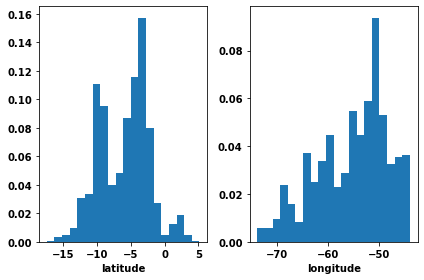

In [103]:
# distribution
fig, axs = plt.subplots(1, 2, tight_layout=True)

axs[0].hist(y_train_1, bins=20, density=True)
axs[1].hist(y_train_2, bins=20, density=True);

axs[0].set_xlabel('latitude')
axs[1].set_xlabel('longitude')

plt.show()

In [195]:
# Desicion Tree Model
# Decision Tree Regressor
dt1 = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    DecisionTreeRegressor(random_state=42)
)
dt2 = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    DecisionTreeRegressor(random_state=42)
)

dt1.fit(X_train, y_train_1)
y_val_pred_1 = dt1.predict(X_val)
dt2.fit(X_train, y_train_2)
y_val_pred_2 = dt2.predict(X_val)

print(f'Desicion Tree validation MAE: {mean_absolute_error(y_val_1, y_val_pred_1):.4f} lat')
print(f'Desicion Tree validation MAE: {mean_absolute_error(y_val_2, y_val_pred_2):.4f} lon')
print(f'Desicion Tree Validation RMSE loss: {mean_squared_error(y_val_1, y_val_pred_1):.4f} lat')
print(f'Desicion Tree Validation RMSE loss: {mean_squared_error(y_val_2, y_val_pred_2):.4f} lon')
print(f'Desicion Tree Validation R^2 coefficient: {r2_score(y_val_1, y_val_pred_1):.4f} lat')
print(f'Desicion Tree Validation R^2 coefficient: {r2_score(y_val_2, y_val_pred_2):.4f} lon')

Desicion Tree validation MAE: 2.2213 lat
Desicion Tree validation MAE: 3.0095 lon
Desicion Tree Validation RMSE loss: 7.9280 lat
Desicion Tree Validation RMSE loss: 15.4705 lon
Desicion Tree Validation R^2 coefficient: 0.4255 lat
Desicion Tree Validation R^2 coefficient: 0.6595 lon


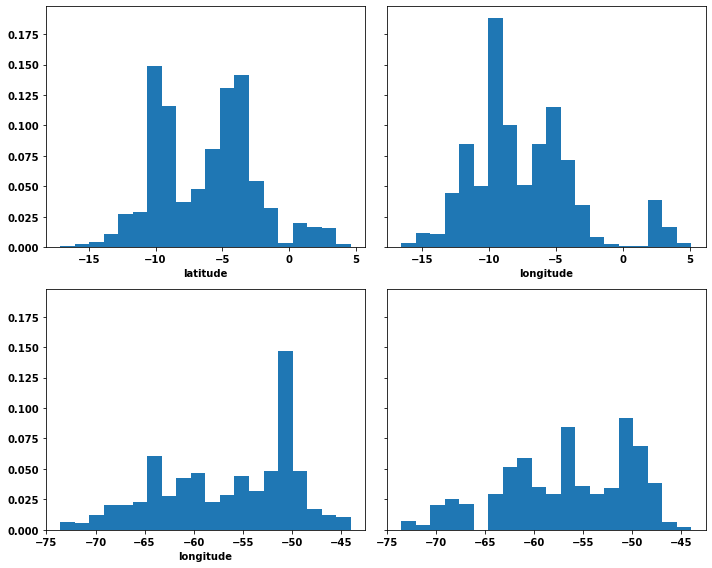

In [196]:
# distribution
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize=(10,8))

axs[0, 0].hist(y_val_1, bins=20, density=True)
axs[0, 1].hist(y_val_pred_1, bins=20, density=True);
axs[1, 0].hist(y_val_2, bins=20, density=True)
axs[1, 1].hist(y_val_pred_2, bins=20, density=True);

axs[0, 0].set_xlabel('latitude')
axs[0, 1].set_xlabel('latitude')
axs[1, 0].set_xlabel('longitude')
axs[0, 1].set_xlabel('longitude')

plt.show()

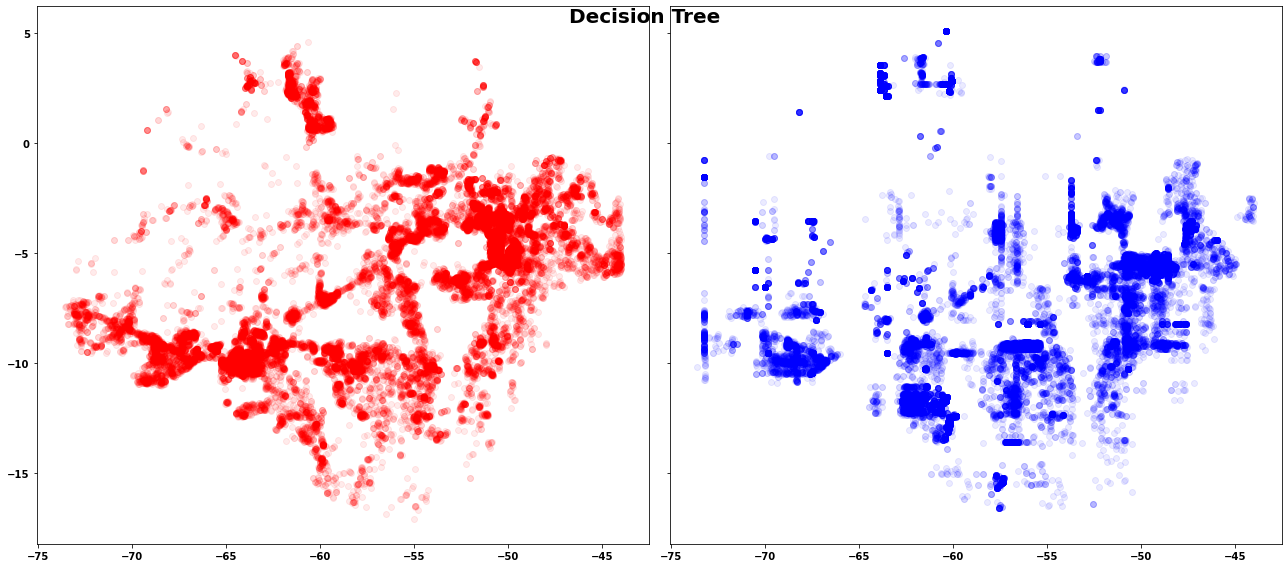

In [197]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(18,8))

axs[0].scatter(x=y_val_2, y=y_val_1, c='red', alpha=0.08)
axs[1].scatter(x=y_val_pred_2, y=y_val_pred_1, c='blue', alpha=0.08);

fig.suptitle("Decision Tree", fontsize=20);

In [198]:
# Random Forest model
# Random forest
rf1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)
)
rf2 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)
)

# max_depth (usually high, can try decreasing)
# n_estimators (too low underfits, too high wastes time)
# min_samples_leaf (increase if overfitting)
# max_features (decrease for more diverse trees)

rf1.fit(X_train, y_train_1)
y_val_pred_1 = rf1.predict(X_val)
rf2.fit(X_train, y_train_2)
y_val_pred_2 = rf2.predict(X_val)
print(f'Random Forest Validation MAE: {mean_absolute_error(y_val_1, y_val_pred_1):.4f} lat')
print(f'Random Forest Validation MAE: {mean_absolute_error(y_val_2, y_val_pred_2):.4f} lon')
print(f'Random Forest Validation RMSE loss: {mean_squared_error(y_val_1, y_val_pred_1):.4f} lat')
print(f'Random Forest Validation RMSE loss: {mean_squared_error(y_val_2, y_val_pred_2):.4f} lon')
print(f'Random Forest Validation R^2 coefficient: {r2_score(y_val_1, y_val_pred_1):.4f} lat')
print(f'Random Forest Validation R^2 coefficient: {r2_score(y_val_2, y_val_pred_2):.4f} lon')

Random Forest Validation MAE: 1.9703 lat
Random Forest Validation MAE: 3.2770 lon
Random Forest Validation RMSE loss: 6.1215 lat
Random Forest Validation RMSE loss: 16.4110 lon
Random Forest Validation R^2 coefficient: 0.5564 lat
Random Forest Validation R^2 coefficient: 0.6388 lon


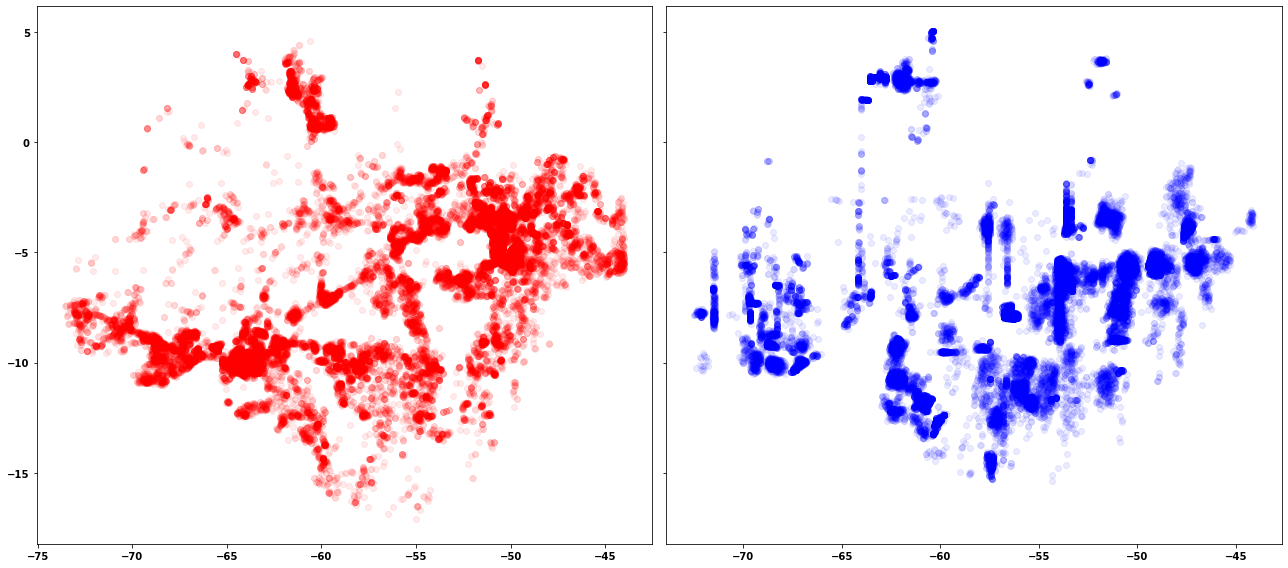

In [199]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(18,8))

axs[0].scatter(x=y_val_2, y=y_val_1, c='red', alpha=0.08)
axs[1].scatter(x=y_val_pred_2, y=y_val_pred_1, c='blue', alpha=0.08);

In [200]:
# XGBoost 

xgb1 = make_pipeline(
    ce.TargetEncoder(),
    XGBRegressor(n_estimators=200, random_state=42, n_jobs=-1)
)
xgb2 = make_pipeline(
    ce.TargetEncoder(),
    XGBRegressor(n_estimators=200, random_state=42, n_jobs=-1)
)

xgb1.fit(X_train, y_train_1)
y_val_pred_1 = xgb1.predict(X_val)
xgb2.fit(X_train, y_train_2)
y_val_pred_2 = xgb2.predict(X_val)
print(f'XGBoost Validation MAE: {mean_absolute_error(y_val_1, y_val_pred_1):.4f} lat')
print(f'XGBoost Validation MAE: {mean_absolute_error(y_val_2, y_val_pred_2):.4f} lon')
print(f'XGBoost Validation RMSE loss: {mean_squared_error(y_val_1, y_val_pred_1):.4f} lat')
print(f'XGBoost Validation RMSE loss: {mean_squared_error(y_val_2, y_val_pred_2):.4f} lon')
print(f'XGBoost Validation R^2 coefficient: {r2_score(y_val_1, y_val_pred_1):.4f} lat')
print(f'XGBoost Validation R^2 coefficient: {r2_score(y_val_2, y_val_pred_2):.4f} lon')

XGBoost Validation MAE: 2.0621 lat
XGBoost Validation MAE: 3.1208 lon
XGBoost Validation RMSE loss: 6.5406 lat
XGBoost Validation RMSE loss: 14.6115 lon
XGBoost Validation R^2 coefficient: 0.5260 lat
XGBoost Validation R^2 coefficient: 0.6784 lon


In [110]:
processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set1 = [(X_train_processed, y_train_1), 
            (X_val_processed, y_val_1)]

model = XGBRegressor(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train_1, eval_set=eval_set1, eval_metric='mae', 
          early_stopping_rounds=10)

[0]	validation_0-mae:4.62893	validation_1-mae:4.73873
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:3.29302	validation_1-mae:3.33159
[2]	validation_0-mae:2.42999	validation_1-mae:2.47678
[3]	validation_0-mae:1.87277	validation_1-mae:1.94420
[4]	validation_0-mae:1.51943	validation_1-mae:1.62047
[5]	validation_0-mae:1.29436	validation_1-mae:1.43726
[6]	validation_0-mae:1.18014	validation_1-mae:1.42234
[7]	validation_0-mae:1.11419	validation_1-mae:1.40467
[8]	validation_0-mae:1.07466	validation_1-mae:1.41370
[9]	validation_0-mae:1.05473	validation_1-mae:1.40883
[10]	validation_0-mae:1.04147	validation_1-mae:1.40647
[11]	validation_0-mae:1.02636	validation_1-mae:1.43119
[12]	validation_0-mae:1.01143	validation_1-mae:1.43649
[13]	validation_0-mae:1.00782	validation_1-mae:1.44080
[14]	validation_0-mae:0.99729	validation_1-mae:1.44973
[15]	validation_0-mae:0.9841

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [111]:
processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set2 = [(X_train_processed, y_train_2), 
            (X_val_processed, y_val_2)]

model2 = XGBRegressor(n_estimators=1000, n_jobs=-1)
model2.fit(X_train_processed, y_train_2, eval_set=eval_set2, eval_metric='mae', 
          early_stopping_rounds=10)

[0]	validation_0-mae:39.00158	validation_1-mae:39.95826
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:27.30198	validation_1-mae:28.03025
[2]	validation_0-mae:19.11216	validation_1-mae:19.65028
[3]	validation_0-mae:13.37909	validation_1-mae:13.81917
[4]	validation_0-mae:9.36582	validation_1-mae:9.72141
[5]	validation_0-mae:6.55677	validation_1-mae:6.85060
[6]	validation_0-mae:4.61705	validation_1-mae:4.85244
[7]	validation_0-mae:3.37180	validation_1-mae:3.58228
[8]	validation_0-mae:2.58491	validation_1-mae:2.77454
[9]	validation_0-mae:2.10281	validation_1-mae:2.30277
[10]	validation_0-mae:1.80827	validation_1-mae:2.07880
[11]	validation_0-mae:1.61659	validation_1-mae:1.97444
[12]	validation_0-mae:1.51723	validation_1-mae:1.92781
[13]	validation_0-mae:1.41877	validation_1-mae:2.00479
[14]	validation_0-mae:1.37522	validation_1-mae:1.97578
[15]	validation_0-ma

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

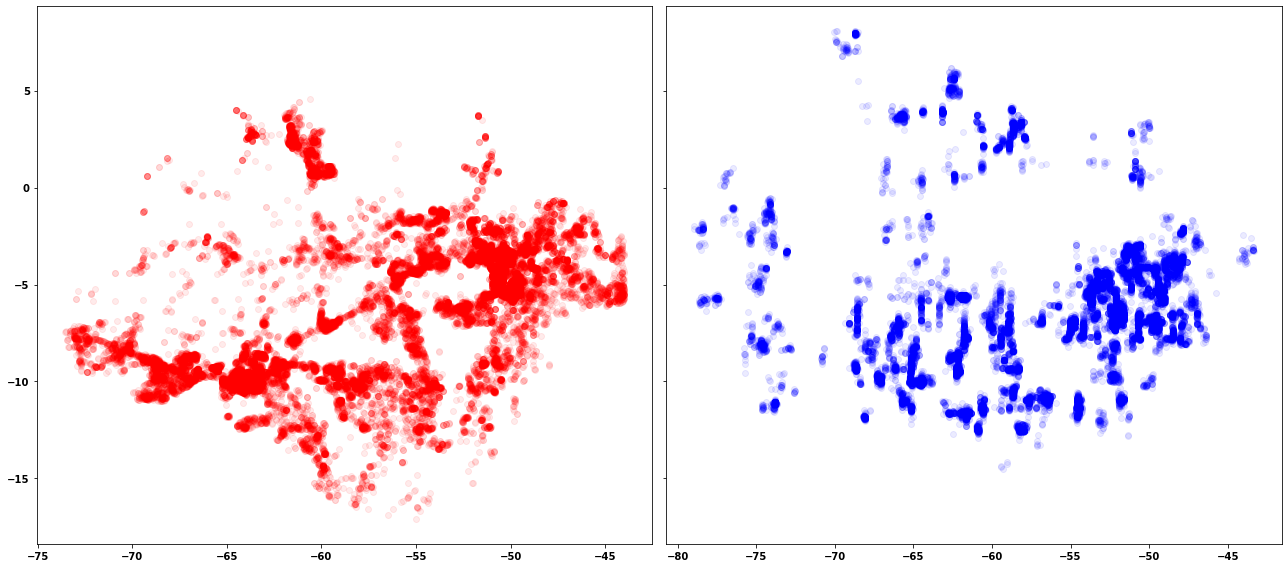

In [201]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(18,8))

axs[0].scatter(x=y_val_2, y=y_val_1, c='red', alpha=0.08)
axs[1].scatter(x=y_val_pred_2, y=y_val_pred_1, c='blue', alpha=0.08);

In [119]:
xgb1.named_steps['xgbregressor'].feature_importances_

array([0.00591794, 0.03103326, 0.04916286, 0.03593797, 0.8779479 ],
      dtype=float32)

In [120]:
xgb2.named_steps['xgbregressor'].feature_importances_

array([9.0340164e-04, 2.4206817e-02, 2.0890214e-02, 2.4586683e-02,
       9.2941284e-01], dtype=float32)

In [121]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [136]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'areakm_squared'

isolated1 = pdp_isolate(
    model=xgb1,
    dataset=X_train,
    model_features=X_val.columns,
    feature=feature
)
isolated2 = pdp_isolate(
    model=xgb2,
    dataset=X_train,
    model_features=X_val.columns,
    feature=feature
)

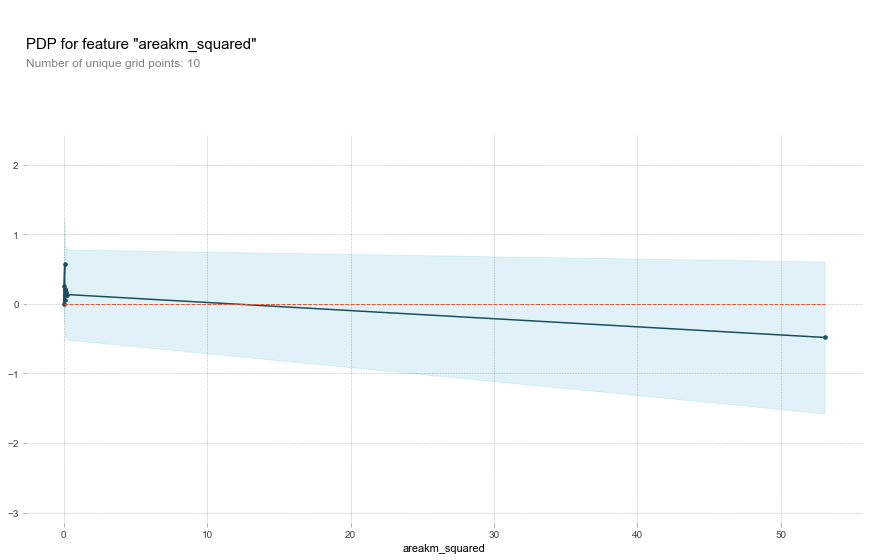

In [137]:
pdp_plot(isolated1, feature_name=feature);

(0.0, 2.0)

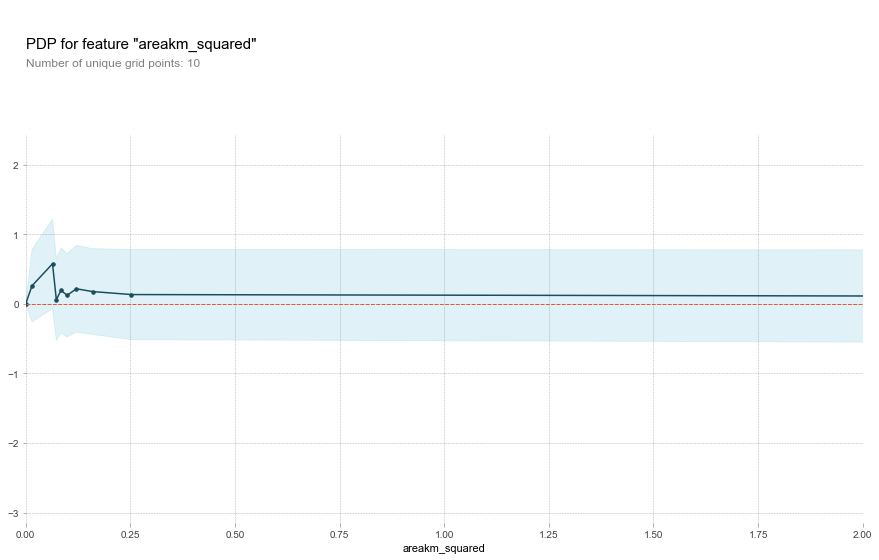

In [138]:
pdp_plot(isolated1, feature_name=feature);
plt.xlim([0, 2])

(0.0, 2.0)

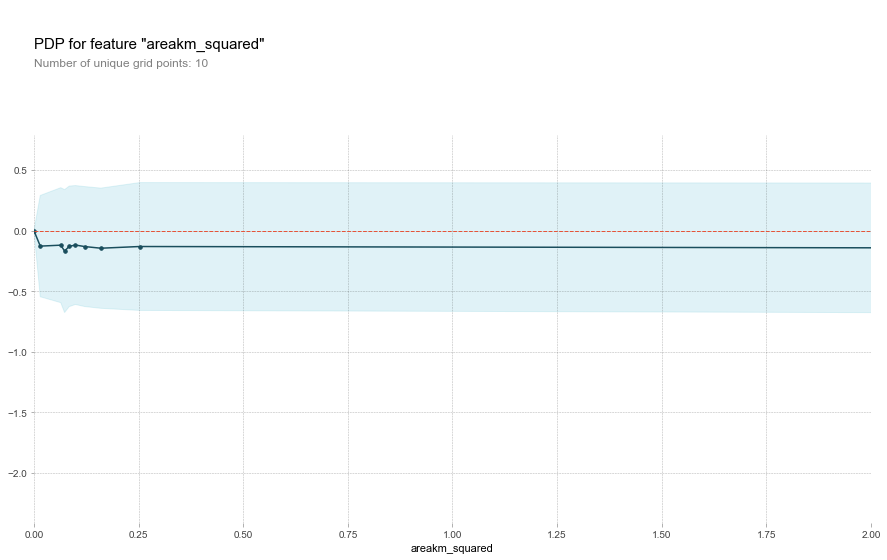

In [141]:
pdp_plot(isolated2, feature_name=feature);
plt.xlim([0, 2])

(0.0, 2.0)

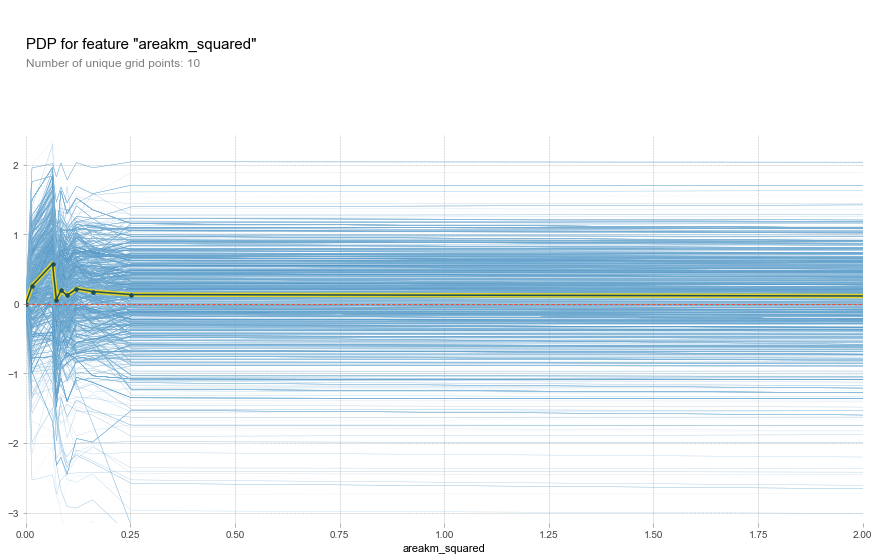

In [142]:
pdp_plot(isolated1, feature_name=feature, plot_lines=True, frac_to_plot=0.01);
plt.xlim([0, 2])

(0.0, 2.0)

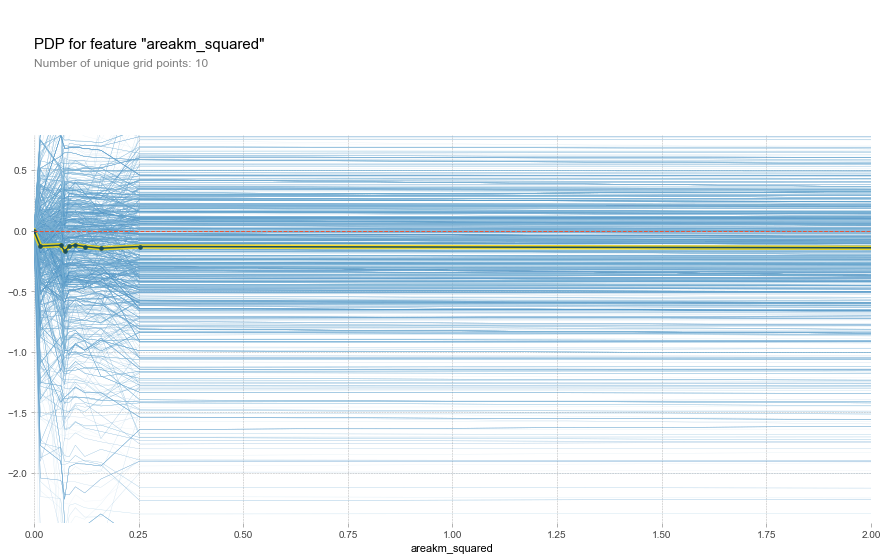

In [143]:
pdp_plot(isolated2, feature_name=feature, plot_lines=True, frac_to_plot=0.01);
plt.xlim([0, 2])

In [144]:
isolated1 = pdp_isolate(
    model=xgb1,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature,
    num_grid_points=50
)
isolated2 = pdp_isolate(
    model=xgb2,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature,
    num_grid_points=50
)

(0.0, 1.0)

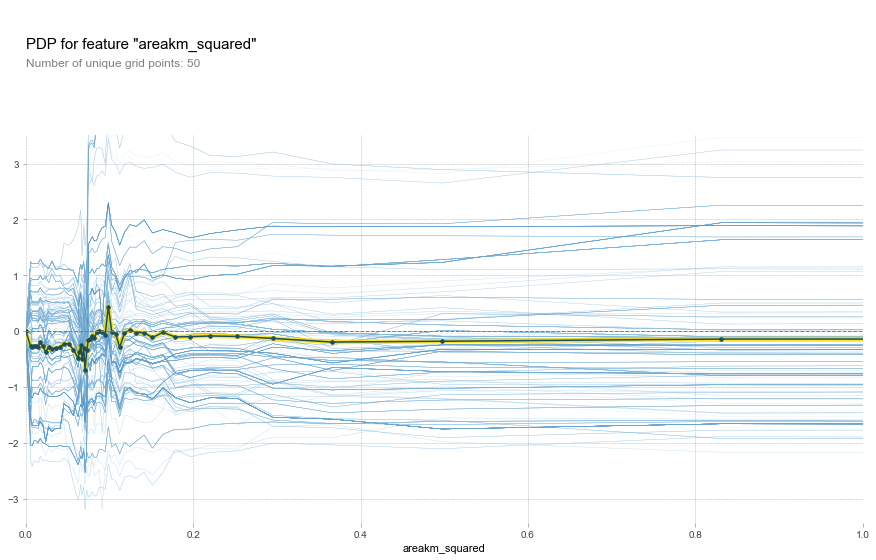

In [145]:
pdp_plot(isolated1, feature_name=feature, plot_lines=True, frac_to_plot=0.01);
plt.xlim([0, 1])

(0.0, 1.0)

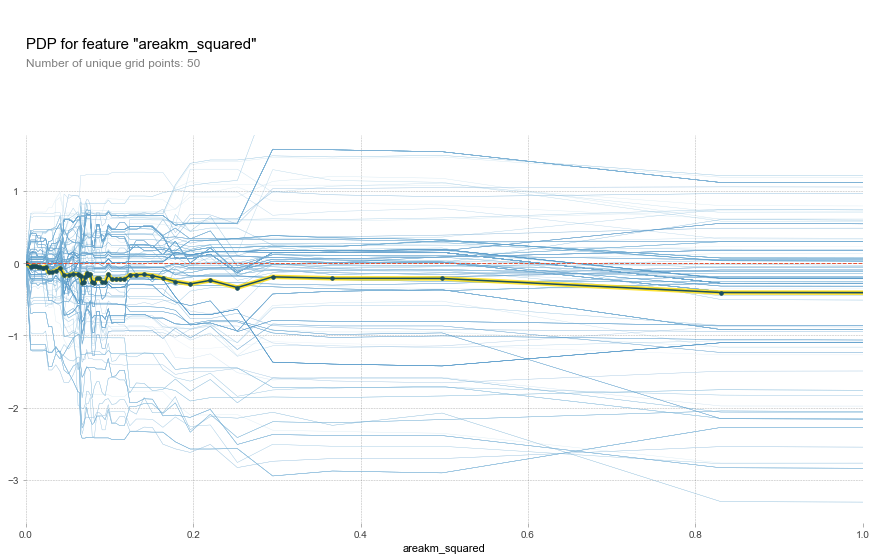

In [146]:
pdp_plot(isolated2, feature_name=feature, plot_lines=True, frac_to_plot=0.01);
plt.xlim([0, 1])

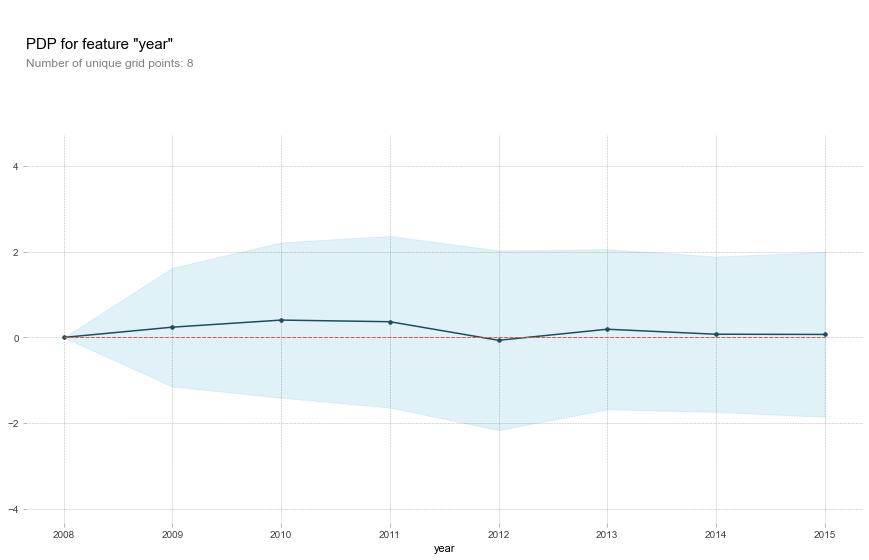

In [147]:
feature = 'year'
pdp_dist = pdp_isolate(model=xgb1, dataset=X_train, model_features=features, feature=feature)
pdp_plot(pdp_dist, feature);

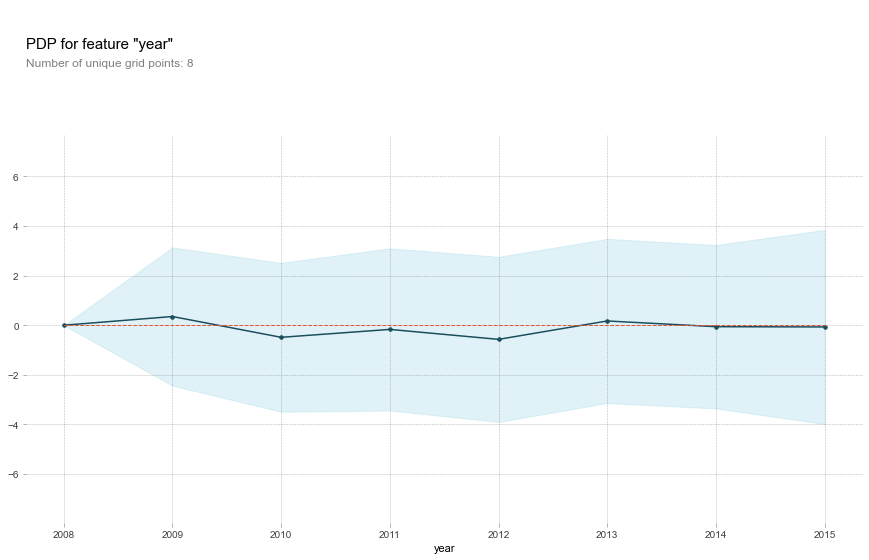

In [148]:
feature = 'year'
pdp_dist = pdp_isolate(model=xgb2, dataset=X_train, model_features=features, feature=feature)
pdp_plot(pdp_dist, feature);

In [149]:
# for categorical features

# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)

gb1 = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
gb2 = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)

gb1.fit(X_train_encoded, y_train_1)
gb2.fit(X_train_encoded, y_train_2)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [150]:
# Look at the encoder's mappings
encoder.mapping

[{'col': 'states', 'mapping': Amazonas       1
  Para           2
  Mato Grosso    3
  Roraima        4
  Acre           5
  Rondonia       6
  Maranhao       7
  Tocantins      8
  Amapa          9
  NaN           -2
  dtype: int64, 'data_type': dtype('O')}]

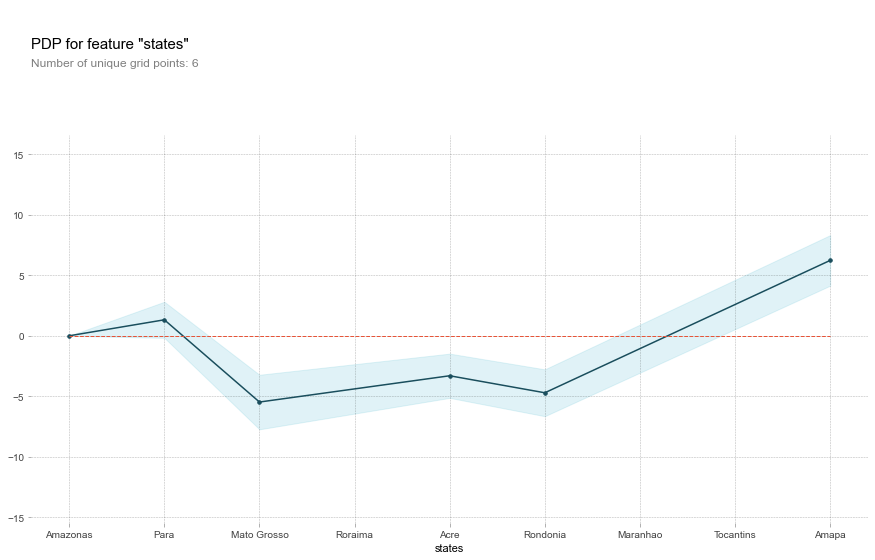

In [151]:
feature = 'states'
for item in encoder.mapping:
    feature_mapping = item['mapping']
        
feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names = feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()

feature = 'states'
pdp_dist = pdp_isolate(model=gb1, dataset=X_train_encoded, model_features=features, feature=feature, num_grid_points=9)
pdp_plot(pdp_dist, feature)
plt.xticks(category_codes, category_names);

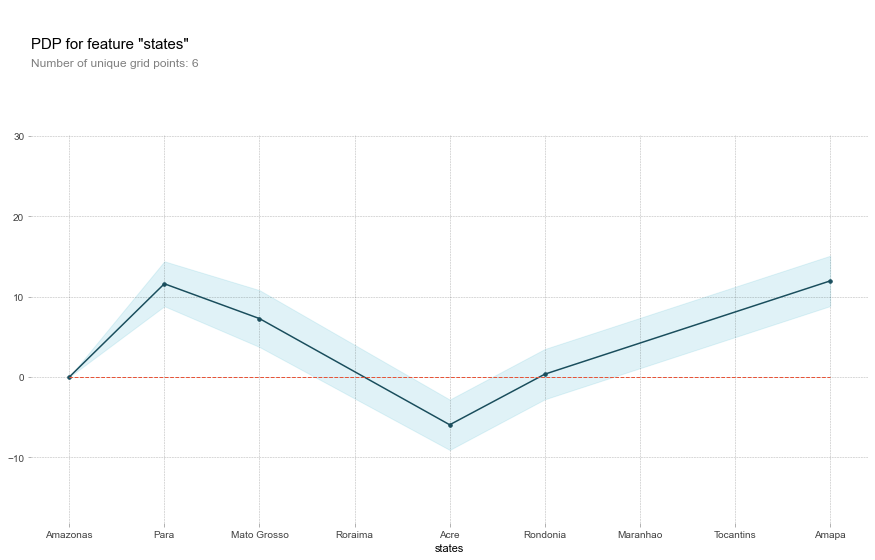

In [152]:
feature = 'states'
pdp_dist = pdp_isolate(model=gb2, dataset=X_train_encoded, model_features=features, feature=feature, num_grid_points=9)
pdp_plot(pdp_dist, feature)
plt.xticks(category_codes, category_names);

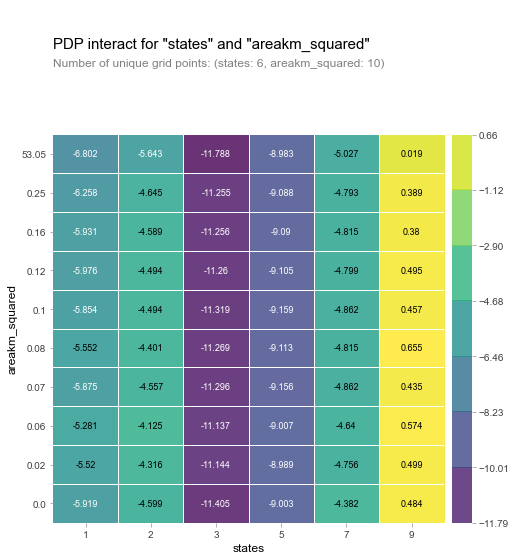

In [158]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
features_pdp = ['states', 'areakm_squared']

interaction1 = pdp_interact(
    model=gb1, 
    dataset=X_train_encoded, 
    model_features=X_train_encoded.columns, 
    features=features_pdp
)

pdp_interact_plot(interaction1, plot_type='grid', feature_names=features_pdp);
plt.xticks(category_codes, category_names);

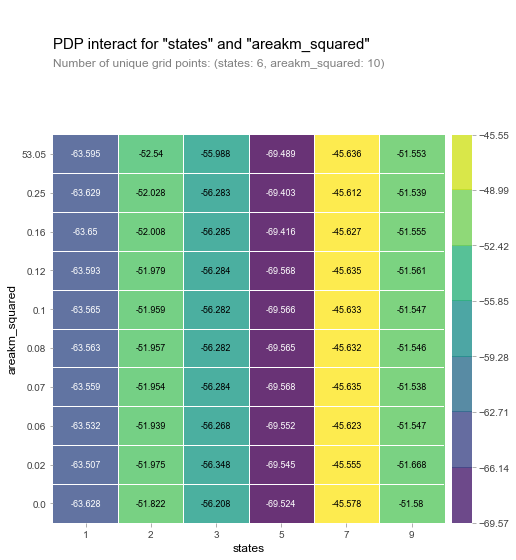

In [159]:
features_pdp = ['states', 'areakm_squared']
interaction2 = pdp_interact(
    model=gb2, 
    dataset=X_train_encoded, 
    model_features=X_train_encoded.columns, 
    features=features_pdp
)

pdp_interact_plot(interaction2, plot_type='grid', feature_names=features_pdp);
plt.xticks(category_codes, category_names);

In [160]:
for item in encoder.mapping:
    feature_mapping = item['mapping']
        
feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names = feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()
category_names

['Amazonas',
 'Para',
 'Mato Grosso',
 'Roraima',
 'Acre',
 'Rondonia',
 'Maranhao',
 'Tocantins',
 'Amapa']

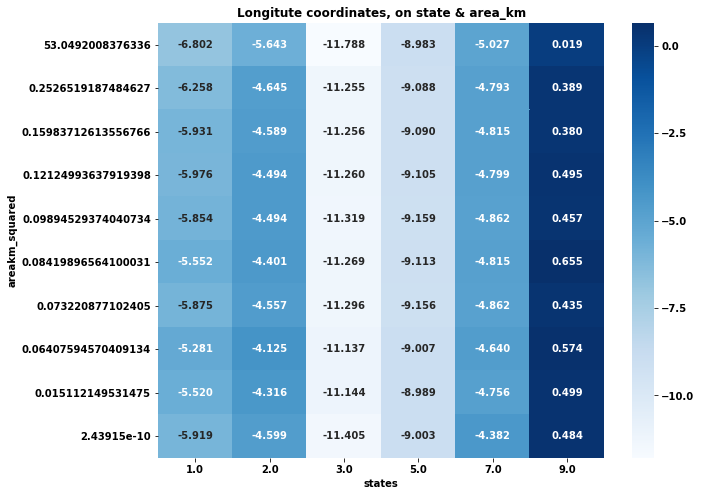

In [162]:
pdp = interaction1.pdp.pivot_table(
    values='preds', 
    columns=features_pdp[0], # First feature on x axis
    index=features_pdp[1]    # Next feature on y axis
)[::-1]  # Reverse the index order so y axis is ascending

plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.3f', cmap='Blues')
plt.title('Latitude coordinates, on state & area_km');

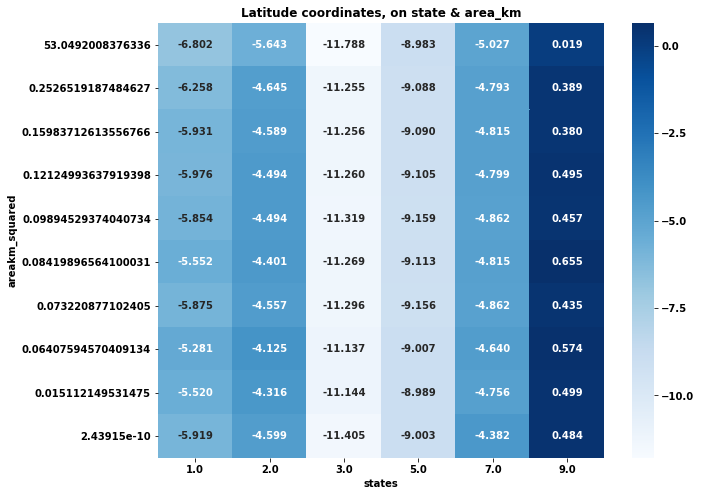

In [166]:
pdp1 = interaction1.pdp.pivot_table(
    values='preds', 
    columns=features_pdp[0], # First feature on x axis
    index=features_pdp[1]    # Next feature on y axis
)[::-1]  # Reverse the index order so y axis is ascending

plt.figure(figsize=(10,8))
sns.heatmap(pdp1, annot=True, fmt='.3f', cmap='Blues')
plt.title('Latitude coordinates, on state & area_km');

In [202]:
# for categorical features

# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)

randomf1 = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)
randomf2 = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)

randomf1.fit(X_train_encoded, y_train_1)
randomf2.fit(X_train_encoded, y_train_2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [203]:
row = X_test.iloc[[0]]
row

,areakm_squared,day,month,year,states
0,0.016815,22,7,2018,Roraima


In [204]:
print(y_test_1.iloc[[0]])
print(y_test_2.iloc[[0]])

0    4.0081
Name: lat, dtype: float64
0   -64.51
Name: lon, dtype: float64


In [205]:
row_encoded = encoder.transform(row)
pred_1 = randomf1.predict(row_encoded)
pred_2 = randomf2.predict(row_encoded)
print(pred_1)
print(pred_2)

[2.80778225]
[-61.53984204]


In [206]:
import shap

In [ ]:
explainer1 = shap.TreeExplainer(randomf1)
explainer2 = shap.TreeExplainer(randomf1)
shap_values_1 = explainer1.shap_values(row_encoded)
shap_values_2 = explainer2.shap_values(row_encoded)


In [ ]:
shap_values_1, shap_values_2

In [50]:
shap.initjs()
shap.force_plot(
    base_value=explainer1.expected_value,
    shap_values=shap_values_1,
    features=row_encoded
)

In [52]:
shap.initjs()
shap.force_plot(
    base_value=explainer2.expected_value,
    shap_values=shap_values_2,
    features=row_encoded
)

-5.96503823959414

In [51]:
shap.force_plot(
    base_value=explainer2.expected_value,
    shap_values=shap_values_2,
    features=row_encoded
)

In [53]:
y_train_2.mean()

-55.214676066358194

In [47]:
def predict(areakm_squared, day, month, year, states):

    # Make dataframe from the inputs
    df1 = pd.DataFrame(
        data=[[areakm_squared, day, month, year, states]], 
        columns=['areakm_squared', 'day', 'month', 'year', 'states']
    )
    df2 = pd.DataFrame(
        data=[[areakm_squared, day, month, year, states]], 
        columns=['areakm_squared', 'day', 'month', 'year', 'states']
    )
    
    # encode 
    df1_encoded = encoder.transform(df1)
    df2_encoded = encoder.transform(df2)
    # Get the model's prediction
    pred1 = gb1.predict(df1_encoded)[0]
    pred2 = gb2.predict(df2_encoded)[0]
    
    # Calculate shap values
    explainer1 = shap.TreeExplainer(gb1)
    explainer2 = shap.TreeExplainer(gb2)
    shap_values1 = explainer1.shap_values(df1_encoded)
    shap_values2 = explainer2.shap_values(df2_encoded)

    # Get series with shap values, feature names, & feature values
    feature_names1 = df1.columns
    feature_values1 = df1.values[0]
    shaps1 = pd.Series(shap_values1[0], zip(feature_names1, feature_values1))
    
    feature_names2 = df2.columns
    feature_values2 = df2.values[0]
    shaps2 = pd.Series(shap_values2[0], zip(feature_names2, feature_values2))

    # Print results
    result1 = f'{pred1:.4f} estimated latitude for location. \n\n'
    result1 += f'Starting from baseline of {explainer1.expected_value} \n'
    result1 += shaps1.to_string()
    result2 = f'{pred2:.4f} estimated longitude for location. \n\n'
    result2 += f'Starting from baseline of {explainer2.expected_value} \n'
    result2 += shaps2.to_string()
    print(result1)
    print(result2)


    # Show shapley values force plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer1.expected_value, 
        shap_values=shap_values1, 
        features=df1), shap.force_plot(
        base_value=explainer2.expected_value, 
        shap_values=shap_values2, 
        features=df2)

location = predict(0.5, 5, 8, 2014, 'Mato Grosso')

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


-11.1676 estimated latitude for location. 

Starting from baseline of -5.965021133422852 
(areakm_squared, 0.5)   -0.125090
(day, 5)                -0.433291
(month, 8)              -0.259210
(year, 2014)             0.018871
(states, Mato Grosso)   -4.403854
-55.1486 estimated longitude for location. 

Starting from baseline of -55.214683532714844 
(areakm_squared, 0.5)   -0.034266
(day, 5)                 0.886694
(month, 8)              -0.068071
(year, 2014)            -0.208566
(states, Mato Grosso)   -0.509734


In [48]:
location[0]
    

In [49]:
location[1]